<a href="https://colab.research.google.com/github/reyhanalemmario/bangkit/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Machine Learning Bangkit Project
##"Heart Attack Prediction"
###By Rizal, Rinda and Reyhan
---
* This notebook file contains step-by-step process in solving Binary Classification problem in order to predict that someone actually has potential of getting heart attack or not by looking at Cardio column in the dataset.

* The dataset that we are using is from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset, The desription of each feature is available in that link.

* In this notebook we are trying to predict that binary value column by looking at another features in the dataset.

In [1]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction to the Data

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/reyhanalemmario/bangkit/master/cardio.csv'
data = pd.read_csv(url, sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


There are 13 columns in this dataset, we are going to examine this columns in more detail. And notice that age column have a huge value, that's because the age unit is in days, we are going to convert that.

In [3]:
data["age"] = data["age"]/365
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


Every features, but weight has int data type and weight feature has float datatype. So, we can continue to analyze this dataset because we have a propper data type. And last thing to notice is we don't have null value in this dataset.

In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Look at the maximal and minimal value of height and weight we are going to examine that.

## Manipulating Data

In [6]:
data = data.sort_values(["height"], ascending=False)
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,58.136986,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,52.202740,2,207,78.0,100,70,1,1,0,1,1,0
41901,59847,52.567123,2,200,100.0,170,1100,2,2,0,0,1,1
8897,12687,61.635616,2,198,79.0,160,100,1,1,1,0,0,1
30127,43083,63.764384,1,198,85.0,110,90,1,1,0,0,1,0
1117,1554,60.701370,2,198,68.0,120,80,1,1,0,0,1,1
57529,82105,51.572603,2,198,78.0,120,80,1,1,1,0,1,1
54289,77425,58.673973,2,198,110.0,140,80,2,3,0,0,1,1
66145,94422,61.750685,1,198,80.0,140,90,1,2,0,0,1,1
3237,4561,44.032877,2,198,61.0,110,70,1,1,0,0,1,1


We have one person that has 250 cm height, I think, it is possible but we don't want out model get affected by this outlier.

In [7]:
data = data[1:] #Remove that one outlier
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
21628,30894,52.202740,2,207,78.0,100,70,1,1,0,1,1,0
41901,59847,52.567123,2,200,100.0,170,1100,2,2,0,0,1,1
8897,12687,61.635616,2,198,79.0,160,100,1,1,1,0,0,1
30127,43083,63.764384,1,198,85.0,110,90,1,1,0,0,1,0
1117,1554,60.701370,2,198,68.0,120,80,1,1,0,0,1,1


In [8]:
data = data.sort_values(["height"], ascending=True)
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22723,32456,64.071233,1,55,81.0,130,90,1,1,0,0,1,1
66643,95141,51.589041,1,57,61.0,130,90,1,1,0,0,1,1
64115,91523,50.482192,1,59,57.6,125,67,1,1,0,0,0,0
29157,41661,52.295890,1,60,69.0,110,70,1,1,0,0,0,0
27603,39462,57.473973,1,64,61.0,130,70,1,1,0,0,1,0
33607,48009,53.997260,2,65,72.0,130,80,1,1,0,0,0,0
44490,63545,52.383562,1,65,60.0,120,80,1,1,0,0,1,0
64454,92008,58.487671,1,66,63.0,12,80,1,1,0,0,0,1
14323,20459,60.287671,1,67,57.0,120,90,1,1,0,0,1,1
50789,72476,39.723288,2,67,60.0,110,80,1,1,1,1,1,0


We are not really sure about people that has more weight in Kg than height in Cm. So we are going to add one more feature, BMI and we have to look to this [source](https://www.webmd.com/diet/news/20070409/morbid-obesity-bulge-gets-bigger) and filter this data based on that source. Notice that BMI has fix unit kg/m2, so we convert the height unit first and we choose Max value of BMI is 70 because it says extreme obese people has 50 or more. We assume that more than 70 BMI has an invalid values. And base on this [source](https://www.ennonline.net/fex/15/limits), it says fatal value 13 for male and 11 for female, so we choose minimum value of 12.

In [9]:
data["height"] = data["height"]/100 # Convert the height unit

data['BMI'] = data["weight"]/data["height"]**2
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
22723,32456,64.071233,1,0.55,81.0,130,90,1,1,0,0,1,1,267.768595
66643,95141,51.589041,1,0.57,61.0,130,90,1,1,0,0,1,1,187.750077
64115,91523,50.482192,1,0.59,57.6,125,67,1,1,0,0,0,0,165.469693
29157,41661,52.295890,1,0.60,69.0,110,70,1,1,0,0,0,0,191.666667
27603,39462,57.473973,1,0.64,61.0,130,70,1,1,0,0,1,0,148.925781


In [10]:
#Filtering the acceptable BMI values
data = data[data["BMI"] <= 70]
data = data[data["BMI"] >= 12]
data.sort_values(["BMI"], ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
3420,4838,39.769863,1,1.00,70.0,100,70,1,1,0,0,1,0,70.000000
36780,52564,53.780822,1,1.61,181.0,180,1100,2,1,0,0,1,1,69.827553
67866,96921,59.624658,1,1.33,123.0,180,100,2,1,0,0,1,1,69.534739
40712,58175,59.528767,1,1.54,162.0,120,80,1,1,0,0,1,0,68.308315
18952,27063,42.249315,1,1.55,163.0,180,100,1,1,0,0,1,1,67.845994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,14908,60.293151,1,1.62,38.0,100,70,1,1,0,0,1,0,14.479500
9487,13518,57.419178,2,1.72,40.0,140,90,1,2,0,0,1,1,13.520822
38417,54851,59.750685,1,1.54,32.0,110,60,1,1,0,0,1,0,13.493001
16322,23318,59.923288,1,1.65,35.0,100,70,1,1,0,0,1,0,12.855831


In [11]:
data = data.sort_values(["weight"], ascending=False)
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
435,618,45.931507,1,1.86,200.0,130,70,1,1,0,0,0,0,57.810151
50413,71945,41.416438,2,1.80,200.0,150,90,1,1,0,0,1,1,61.728395
61285,87498,57.367123,2,1.80,183.0,110,80,3,3,0,1,1,1,56.481481
36780,52564,53.780822,1,1.61,181.0,180,1100,2,1,0,0,1,1,69.827553
4743,6716,47.172603,2,1.76,180.0,140,90,1,1,0,0,1,1,58.109504
60592,86506,51.986301,2,1.80,180.0,140,100,3,1,0,0,1,1,55.555556
61362,87612,45.520548,2,1.96,180.0,130,80,3,1,0,0,1,1,46.855477
45378,64829,47.720548,2,1.90,180.0,140,80,2,2,0,0,1,1,49.861496
61788,88220,51.934247,2,1.65,178.0,120,80,1,1,0,0,1,0,65.381084
20092,28683,56.591781,2,1.65,178.0,120,80,1,1,1,1,1,0,65.381084


At first sight, we thought that 200 Kg is unusual but, there is a few people that has weight in that number. And look at cardio values, maybe this column will be a good feature to feed into machine learning. Now, all is good, and finally we have to remove id column because it has no real connection to label that we are trying to predict.

In [12]:
data = data.drop(columns='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
435,45.931507,1,1.86,200.0,130,70,1,1,0,0,0,0,57.810151
50413,41.416438,2,1.80,200.0,150,90,1,1,0,0,1,1,61.728395
61285,57.367123,2,1.80,183.0,110,80,3,3,0,1,1,1,56.481481
36780,53.780822,1,1.61,181.0,180,1100,2,1,0,0,1,1,69.827553
4743,47.172603,2,1.76,180.0,140,90,1,1,0,0,1,1,58.109504


## Normalizing Data
To make training process more feasible, we normalize the data so the value of the features doesn't really have a significant difference.

In [14]:
data_mean = data.mean()
data_std = data.std()
data_norm = (data - data_mean)/data_std
#Cardio and gender column get affected so we replace that value with pre-normilize value
data_norm = data_norm.drop(columns='cardio')
data_norm = data_norm.drop(columns='gender')
data_norm['gender'] = data['gender']
data_norm['cardio'] = data['cardio']
data_norm.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,gender,cardio
435,-1.095938,2.707238,8.769187,0.007674,-0.141251,-0.539346,-0.395780,-0.310876,-0.238363,-2.023700,5.737635,1,0
50413,-1.763893,1.955240,8.769187,0.137494,-0.035147,-0.539346,-0.395780,-0.310876,-0.238363,0.494137,6.479254,2,1
61285,0.595839,1.955240,7.584170,-0.122146,-0.088199,2.400610,3.098485,-0.310876,4.195218,0.494137,5.486153,2,1
36780,0.065284,-0.426090,7.444756,0.332224,5.323107,0.930632,-0.395780,-0.310876,-0.238363,0.494137,8.012208,1,1
4743,-0.912331,1.453907,7.375050,0.072584,-0.035147,-0.539346,-0.395780,-0.310876,-0.238363,0.494137,5.794294,2,1


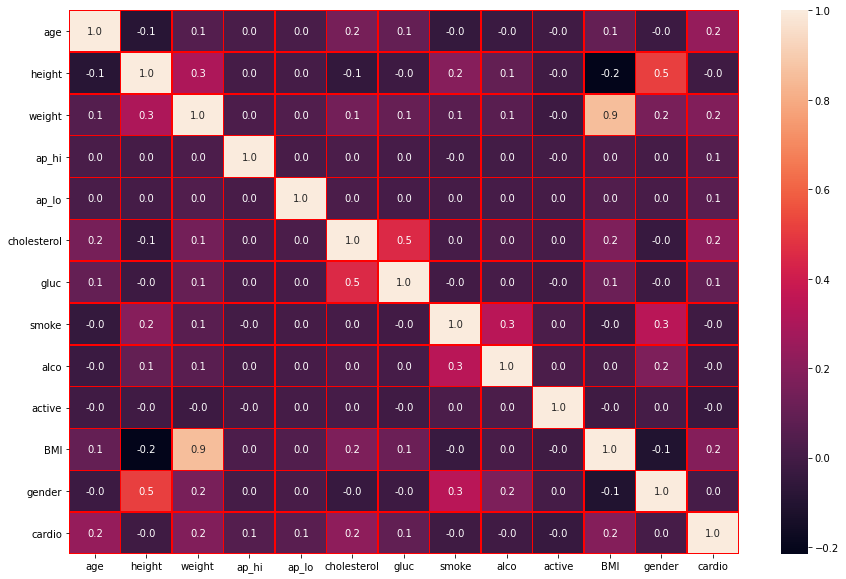

In [15]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_norm.corr(),annot=True,linewidth=0.5,linecolor='red', fmt = '.1f',ax=ax)
plt.show()

There are four features that has 0.2 correlation value to the label(cardio). And notice, at first height value doesn't really have a connection to the result but when we create BMI column, height value have a connection through BMI value.